<a href="https://colab.research.google.com/github/koushikroy/facial_sentiment_analysis/blob/main/03_eye_tracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**In this we are going to make a NN where the inputs are distances and output are the 9 classes**

# Dataset Loading and Preprocessing

## Drive Mount

In [ ]:
# Google Drive Mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Codes/Eye Tracking/final_dataset.zip" -d "/tmp"

Archive:  /content/drive/MyDrive/Codes/Eye Tracking/final_dataset.zip
  inflating: /tmp/final_dataset.csv  
  inflating: /tmp/__MACOSX/._final_dataset.csv  


## Imports

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Dataset Loading and EDA

In [ ]:
input_df = pd.read_csv('/tmp/final_dataset.csv')

In [ ]:
display(input_df.head())
display(input_df.info())

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181,2182,2183,2184,2185,2186,2187,2188,2189,2190,2191,2192,2193,2194,2195,2196,2197,2198,2199,2200,2201,2202,2203,2204,2205,2206,2207,2208,2209,2210,output
0,0,0.058757,0.110986,0.078615,0.228407,0.328576,0.283223,0.370292,0.378883,0.339486,0.281941,0.204064,0.137100,0.124728,0.150299,0.208915,0.280805,0.242965,0.310228,0.286812,0.248601,0.182099,0.152411,0.322290,0.349934,0.264387,0.327862,0.175787,0.046164,0.202702,0.256533,0.312418,0.331482,0.376683,0.159383,0.078885,0.066579,0.093475,0.085122,0.111178,...,0.078615,0.111178,0.147292,0.041290,0.061936,0.093475,0.066579,0.079424,0.041290,0.117696,0.201648,0.020645,0.052635,0.026114,0.047078,0.026114,0.080754,0.161244,0.032643,0.009233,0.038068,0.038068,0.064299,0.141235,0.026918,0.035157,0.061591,0.036931,0.115502,0.029197,0.036931,0.055780,0.139718,0.039171,0.039712,0.148013,0.078615,0.176393,0.119849,down
1,1,0.052316,0.110313,0.073986,0.229422,0.330431,0.284631,0.374457,0.376587,0.337429,0.286695,0.202828,0.142906,0.123462,0.149389,0.207750,0.279028,0.248708,0.314768,0.291429,0.254978,0.180996,0.151488,0.326779,0.347814,0.260613,0.324516,0.180763,0.045884,0.203242,0.254978,0.311811,0.326070,0.377537,0.153147,0.078407,0.066175,0.092909,0.084607,0.110504,...,0.072550,0.116983,0.160530,0.041040,0.061560,0.094482,0.066175,0.078942,0.041040,0.123462,0.206122,0.020520,0.053510,0.025956,0.046793,0.025956,0.086574,0.165820,0.033088,0.009177,0.037837,0.037837,0.069889,0.145823,0.029020,0.041040,0.064890,0.045884,0.115534,0.029020,0.036707,0.061560,0.144080,0.038934,0.045884,0.151488,0.084607,0.180414,0.119123,down
2,2,0.051589,0.109627,0.068550,0.219254,0.320168,0.274352,0.363935,0.367573,0.322690,0.272756,0.196128,0.129616,0.116255,0.141870,0.200324,0.270920,0.235354,0.299151,0.280942,0.244114,0.172071,0.143183,0.310608,0.338355,0.250835,0.314929,0.165292,0.040785,0.197817,0.248921,0.305001,0.324041,0.366667,0.157432,0.083832,0.065764,0.098645,0.090511,0.109817,...,0.077384,0.109817,0.151783,0.040785,0.061177,0.087711,0.065764,0.078451,0.034727,0.116255,0.204840,0.020392,0.046947,0.025795,0.046502,0.026588,0.079765,0.164788,0.026588,0.009120,0.037602,0.041292,0.063512,0.144915,0.023251,0.039226,0.064487,0.045599,0.119952,0.028839,0.041292,0.055097,0.143183,0.045141,0.039226,0.150545,0.084080,0.184436,0.121673,down
3,3,0.053499,0.099756,0.071776,0.219681,0.325420,0.277274,0.366469,0.371836,0.332382,0.282544,0.203013,0.140764,0.119443,0.152765,0.206668,0.279015,0.243359,0.306394,0.287258,0.248728,0.174558,0.146587,0.318790,0.339460,0.254330,0.321883,0.172273,0.048309,0.203555,0.258111,0.309041,0.323588,0.369699,0.150442,0.077669,0.069279,0.093843,0.087279,0.112807,...,0.073294,0.113002,0.149708,0.040363,0.061178,0.087279,0.066688,0.082079,0.035734,0.113585,0.195950,0.020984,0.046921,0.026543,0.047851,0.020984,0.075659,0.158286,0.026543,0.009384,0.038692,0.037537,0.059352,0.138080,0.020984,0.033836,0.059352,0.037537,0.117398,0.029676,0.038692,0.050536,0.136799,0.046921,0.033836,0.146136,0.079628,0.175188,0.121815,down
4,4,0.057782,0.115565,0.077310,0.221383,0.320885,0.275773,0.363185,0.372431,0.327496,0.277931,0.195265,0.134978,0.115743,0.147806,0.199132,0.269651,0.239709,0.304201,0.280809,0.244476,0.171314,0.143561,0.316227,0.336865,0.251786,0.321077,0.172871,0.039053,0.194948,0.247826,0.303659,0.325983,0.367697,0.156739,0.077576,0.065474,0.091924,0.083710,0.109333,...,0.070623,0.105300,0.152608,0.039053,0.060908,0.085657,0.064523,0.078106,0.034574,0.115743,0.203938,0.023149,0.046740,0.025681,0.043068,0.020303,0.078106,0.167420,0.025681,0.014356,0.037436,0.041110,0.063232,0.144278,0.023149,0.032737,0.060569,0.041110,0.123329,0.023149,0.037436,0.052943,0.146405,0.044942,0.039053,0.149883,0.083710,0.183624,0.121137,down


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7203 entries, 0 to 7202
Columns: 2213 entries, Unnamed: 0 to output
dtypes: float64(2211), int64(1), object(1)
memory usage: 121.6+ MB


None

## Mapping The Output Column

In [ ]:
input_df_copy = input_df

In [ ]:
uniqueValues = input_df_copy['output'].unique()
input_df_copy['output'] = input_df_copy['output'].map({uniqueValues[0]:0,uniqueValues[1]:1,uniqueValues[2]:2,
                                                       uniqueValues[3]:3,uniqueValues[4]:4,uniqueValues[5]:5,
                                                       uniqueValues[6]:6,uniqueValues[7]:7})

In [ ]:
input_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7203 entries, 0 to 7202
Columns: 2213 entries, Unnamed: 0 to output
dtypes: float64(2211), int64(2)
memory usage: 121.6 MB


## Train Test Split

In [ ]:
# Create X & y
X = input_df_copy.drop("output", axis=1)
y = input_df_copy["output"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Declaration and Training 

## Model Making

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model_binary = keras.Sequential([
    layers.Dense(256, activation='relu'),    
    layers.Dropout(.2),
    layers.Dense(128, activation='relu'),    
    layers.Dropout(.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(8, activation='softmax')
])

model_binary.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate = .0003),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=250,
    min_delta=0.0001,
    restore_best_weights=True,
)




## Training 

In [ ]:
history = model_binary.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=1000,
    callbacks=[early_stopping],
    verbose=1, 
)

Epoch 1/1000
181/181 [==============================] - 2s 8ms/step - loss: 19.0492 - accuracy: 0.2010 - val_loss: 1.5949 - val_accuracy: 0.2831
Epoch 2/1000
181/181 [==============================] - 1s 7ms/step - loss: 3.7850 - accuracy: 0.3124 - val_loss: 1.5201 - val_accuracy: 0.4421
Epoch 3/1000
181/181 [==============================] - 1s 7ms/step - loss: 1.9266 - accuracy: 0.3733 - val_loss: 1.4502 - val_accuracy: 0.6308
Epoch 4/1000
181/181 [==============================] - 1s 6ms/step - loss: 1.4882 - accuracy: 0.4361 - val_loss: 1.1258 - val_accuracy: 0.5753
Epoch 5/1000
181/181 [==============================] - 1s 7ms/step - loss: 1.3009 - accuracy: 0.4790 - val_loss: 0.9612 - val_accuracy: 0.5996
Epoch 6/1000
181/181 [==============================] - 1s 6ms/step - loss: 1.1662 - accuracy: 0.5302 - val_loss: 0.8409 - val_accuracy: 0.6572
Epoch 7/1000
181/181 [==============================] - 1s 6ms/step - loss: 1.0605 - accuracy: 0.5611 - val_loss: 0.8060 - val_accuracy

## Evaluation and Graphs 

In [ ]:
# Evaluate our model on the test set
loss, accuracy = model_binary.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

46/46 [==============================] - 0s 2ms/step - loss: 0.1253 - accuracy: 0.9715
Model loss on the test set: 0.12533998489379883
Model accuracy on the test set: 97.15%


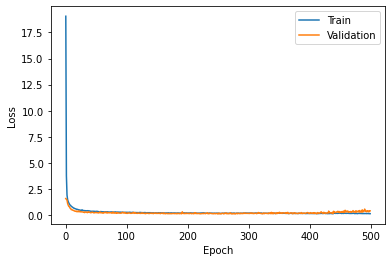

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])#[5:])
plt.plot(history.history['val_loss'])#[5:])
#plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

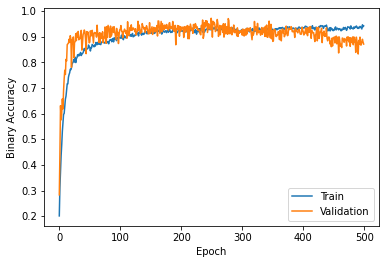

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])#[5:])
plt.plot(history.history['val_accuracy'])#[5:])
#plt.title('model loss')
plt.ylabel('Binary Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()